In [197]:
#工厂的生产主管，决定芯片是否要被接收或抛弃
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [198]:
data = pd.read_csv('ex2data2.txt', names=['Test 1', 'Test 2', 'Accepted'])
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


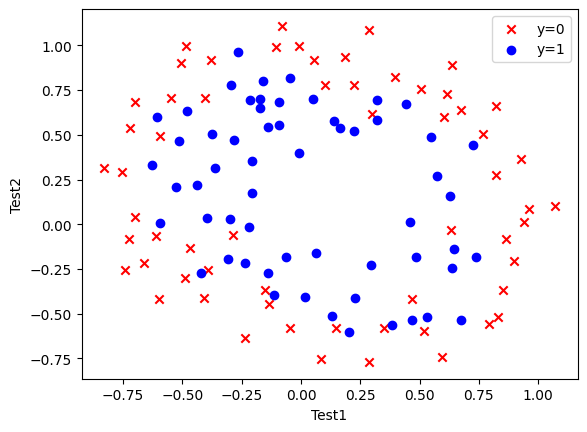

In [199]:
fig, ax = plt.subplots()
ax.scatter(data[data['Accepted'] == 0]['Test 1'], data[data['Accepted'] == 0]['Test 2'], c='r', marker='x',
           label='y=0')  #未被接收
ax.scatter(data[data['Accepted'] == 1]['Test 1'], data[data['Accepted'] == 1]['Test 2'], c='b', marker='o',
           label='y=1')  #接收
ax.legend()
ax.set(xlabel='Test1', ylabel='Test2')
plt.show()

In [200]:
#特征映射
def feature_mapping(x1, x2, power):
    data = {}  #字典
    #注意这个的内外双层循环可以自己带值试一试，作用是列举出所有的特征
    for i in range(power + 1):
        for j in range(i + 1):
            data['F{}{}'.format(i - j, j)] = np.power(x1, i - j) * np.power(x2, j)
    return pd.DataFrame(data)

In [201]:
x1 = data['Test 1']
x2 = data['Test 2']

In [202]:
data2 = feature_mapping(x1, x2, 6)

In [203]:
data2.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [204]:
#构造数据集
X = data2.values  #注意：要使用的是data2里的数据

In [205]:
X.shape

(118, 28)

In [206]:
y = data.iloc[:, -1].values

In [207]:
y = y.reshape(len(y), 1)
y.shape

(118, 1)

<font size='7'>***损失函数***</font>

In [208]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [209]:
def costFunction(X, y, theta, lamda):
    A = sigmoid(X @ theta)
    first = y * np.log(A)
    second = (1 - y) * np.log(1 - A)
    #正则化
    reg = np.sum(np.power(theta[1:], 2)) * (lamda / (2 * len(X)))  #注意theta是从1开始的，并非0
    return -np.sum(first + second) / len(X) + reg

In [210]:
theta = np.zeros((28, 1))
theta.shape

(28, 1)

In [211]:
lamda = 1

In [212]:
cost_init = costFunction(X, y, theta, lamda)
print(cost_init)

0.6931471805599454


<font size='7'>***梯度下降***</font>

In [213]:
def gradientDecscent(X, y, theta, alpha, iters, lamda):
    costs = []
    for i in range(iters):
        reg = theta[1:] * (lamda / len(X))  #注意从1开始取
        reg = np.insert(reg, 0, values=0, axis=0)

        A = sigmoid(X @ theta)

        theta = theta - ((X.T @ (A - y)) / len(X) + reg) * alpha
        cost = costFunction(X, y, theta, lamda)
        costs.append(cost)
        if i % 1000 == 0:
            print(cost)
    return theta, costs

In [214]:
alpha = 0.001
iters = 200000
lamda = 0.001

In [215]:
theta_finals, costs = gradientDecscent(X, y, theta, alpha, iters, lamda)

0.693134380798985
0.6818207729778132
0.6725974534826156
0.6646386240403803
0.6575093538238375
0.6509718395182028
0.6448884710940885
0.6391737353688465
0.6337702418573659
0.6286366014804017
0.6237411486351027
0.6190585708214382
0.6145680074385785
0.6102519084447487
0.606095299581356
0.6020852755591007
0.5982106289182401
0.5944615653289779
0.5908294778704328
0.5873067640636913
0.5838866754107955
0.5805631925079233
0.577330920746929
0.5741850028389882
0.5711210452127982
0.5681350559248265
0.5652233921588479
0.562382715734808
0.5596099553210294
0.5569022742661285
0.5542570431493508
0.5516718162983199
0.5491443116476304
0.5466723934148942
0.5442540571565863
0.5418874168373466
0.539570693605747
0.5373022060189993
0.5350803615003241
0.5329036488471292
0.5307706316368959
0.5286799424017217
0.5266302774625863
0.5246203923312625
0.522649097601925
0.5207152552663782
0.5188177753967813
0.5169556131481398
0.5151277660398903
0.5133332714818484
0.5115712045148232
0.5098406757404322
0.5081408294182519

In [216]:
theta_finals

array([[ 1.87409374],
       [ 1.1843894 ],
       [ 2.02186865],
       [-3.10432578],
       [-1.6883501 ],
       [-2.13168461],
       [ 0.32198006],
       [-0.67395398],
       [-0.63298727],
       [-0.23959322],
       [-2.37237357],
       [-0.13987474],
       [-1.02181183],
       [-0.53636228],
       [-1.93913088],
       [-0.35675659],
       [-0.38678341],
       [-0.07575725],
       [-0.48665931],
       [-0.54632394],
       [-0.75710603],
       [-1.74449867],
       [ 0.01562808],
       [-0.49235847],
       [ 0.00558596],
       [-0.55696471],
       [-0.29755914],
       [-1.56297635]])

In [217]:
def predict(X, theta):
    prob = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in prob]

In [219]:
y_ = np.array(predict(X, theta_finals))
y_pre = y_.reshape(len(y_), 1)

acc = np.mean(y_pre == y)
print(acc)

0.8135593220338984


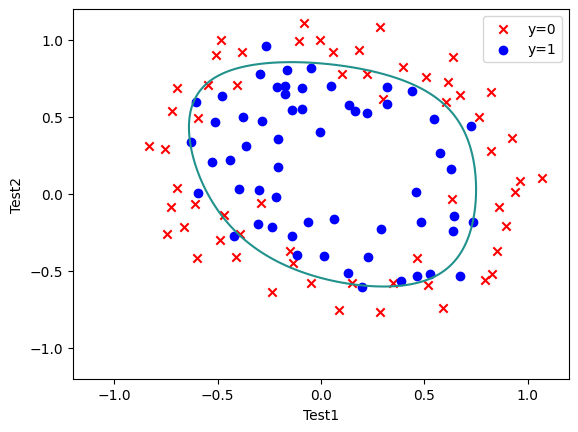

In [220]:
#决策界面显示
x = np.linspace(-1.2, 1.2, 200)
xx, yy = np.meshgrid(x, x)  #网格
z = feature_mapping(xx.ravel(), yy.ravel(), 6).values
#对 xx 和 yy 进行特征映射通常是为了将二维空间中的点映射到更高维的特征空间中。
zz = z @ theta_finals
zz = zz.reshape(xx.shape)

fig, ax = plt.subplots()
ax.scatter(data[data['Accepted'] == 0]['Test 1'], data[data['Accepted'] == 0]['Test 2'], c='r', marker='x',
           label='y=0')  #未被接收
ax.scatter(data[data['Accepted'] == 1]['Test 1'], data[data['Accepted'] == 1]['Test 2'], c='b', marker='o',
           label='y=1')  #接收
ax.legend()
ax.set(xlabel='Test1', ylabel='Test2')
plt.contour(xx, yy, zz, 0)
plt.show()

在 Python 的 Matplotlib 库中，plt.contour 函数用于绘制等高线图。这个函数可以创建三维数据的二维等高线表示。当你调用 plt.contour(xx, yy, zz, 0) 时，你正在请求绘制等高线图中的一个特定等高线，这个等高线对应于 zz 数组中的最小值。

下面是 plt.contour 函数的一些基本用法：

参数解释：
xx: 通常是一个二维数组，表示等高线图的 X 坐标网格。
yy: 通常是一个二维数组，表示等高线图的 Y 坐标网格。
zz: 一个与 xx 和 yy 对应的二维数组，表示在每个 (X, Y) 点的函数值。
0: 这是等高线级别参数，表示绘制 zz 中值为最小的等高线。

特征映射（Feature Mapping）是数据预处理中的一种技术，其目的是将原始数据转换为新的特征表示，以便更适合进行机器学习或统计分析。特征映射可以增强模型的性能，使其能够更有效地学习和预测。

在您提供的代码片段中，`xx.ravel()` 和 `yy.ravel()` 被用来将二维的网格数据 `xx` 和 `yy` 转换为一维数组。`ravel()` 函数是 NumPy 库中的一个函数，它将多维数组"展平"或"拉直"成一维数组。

在特征映射的上下文中，`ravel()` 通常被用于准备数据以用于计算。由于机器学习模型，尤其是那些用于特征学习的模型，通常需要一维数组形式的输入，`ravel()` 函数就非常有用。它使得我们可以将多维网格数据转换成线性序列，然后可以用于计算特征映射或作为模型的输入。

例如，如果您正在使用一个机器学习模型来处理图像数据，您可能会将每个图像表示为一个一维数组。这样，每个图像的所有像素值都会按顺序排列成一个长列表。这使得模型可以更有效地处理数据，因为一维数组在很多数学运算和模型算法中都更为常见和方便。

在您的场景中，`xx` 和 `yy` 可能代表了二维空间中的网格点，而 `ravel()` 函数则用于将这些网格点的坐标转换为一维数组，以便后续计算。这样，每个点的坐标都可以被模型逐一处理，例如，在计算决策函数或进行特征映射时 。
